# NYC Taxi Trip Duration Prediction

The NYC taxi trip duration dataset is a dataset released by the NYC Taxi and Limousine Commission, 
which includes several features like pickup time, dropoff time, pickup coordinates etc as possible predictors for prediction of taxi trip duration. 
The aim of this project is to accurately predict the trip duration using a regression model, using (but not limited to) the above features. 
This project also focuses on selecting the best combination of input features for accurate prediction, by combining both logical reasoning and iterations.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [2]:
import io 
%cd "C:\Users\ailla\Downloads\Python"

C:\Users\ailla\Downloads\Python


In [3]:
# !pip install pyarrow

In [4]:
newyork=pd.read_parquet('newyork.parquet',engine="pyarrow")

# Dataset information

In [5]:
newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  int32         
 1   lpep_pickup_datetime   64809 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[ns]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           64809 non-null  int32         
 6   DOLocationID           64809 non-null  int32         
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

In [6]:
newyork=newyork.drop("ehail_fee",axis=1)

In [7]:
catcols=['store_and_fwd_flag','RatecodeID','payment_type',
        'trip_type']

# Finding the missing values

In [8]:
for col in catcols:
    freq=newyork[col].value_counts(dropna=False)
    print(freq)

N       59779
None     4821
Y         209
Name: store_and_fwd_flag, dtype: int64
1.0     57911
NaN      4821
5.0      1828
2.0       154
4.0        51
3.0        38
99.0        5
6.0         1
Name: RatecodeID, dtype: int64
1.0    38549
2.0    20844
NaN     4821
3.0      481
4.0      114
Name: payment_type, dtype: int64
1.0    58270
NaN     4826
2.0     1713
Name: trip_type, dtype: int64


# Imputing with mode or most_frequent

In [9]:
# Impute with mode or most_frequent
for col in catcols:
    newyork[col]=newyork[col].fillna(
        newyork[col].value_counts().idxmax())

In [10]:
newyork.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [11]:
numcols=['passenger_count', 'trip_distance', 'fare_amount', 
         'extra', 'mta_tax','tip_amount', 'tolls_amount', 
         'improvement_surcharge', 'total_amount',
        'congestion_surcharge']

In [12]:
newyork[numcols].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,59988.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,64809.000000,59988.000000
mean,1.294792,13.696354,16.646276,0.844270,0.571364,2.153087,0.182798,0.952858,21.884576,0.733793
std,0.944409,931.311966,12.650412,1.280076,0.386753,2.846365,1.161675,0.198828,14.721413,1.216754
min,0.000000,0.000000,-113.490000,-2.500000,-0.500000,-0.900000,-6.550000,-1.000000,-94.840000,-2.750000
25%,1.000000,1.130000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,0.000000
50%,1.000000,1.890000,13.500000,0.000000,0.500000,1.720000,0.000000,1.000000,18.000000,0.000000
75%,1.000000,3.350000,19.800000,1.000000,0.500000,3.350000,0.000000,1.000000,26.320000,2.750000
max,9.000000,178919.980000,440.000000,12.700000,4.250000,80.000000,45.350000,1.000000,441.000000,2.750000


# Imputing with Median

In [13]:
# Impute with Median
for col in numcols:
    newyork[col]=newyork[col].fillna(newyork[col].median())

# Using datetime variables to calculate trip_duration

In [14]:
# Using datetime variables calculate trip_duration
newyork['trip_duration']=newyork.lpep_dropoff_datetime-newyork.lpep_pickup_datetime

In [15]:
newyork.trip_duration=newyork.trip_duration.dt.total_seconds()/60

In [16]:
newyork.trip_duration.head()

0    19.583333
1    17.550000
2    23.716667
3    20.733333
4    10.950000
Name: trip_duration, dtype: float64

In [17]:
newyork.trip_duration.describe()

count    64809.000000
mean        17.744897
std         69.280970
min          0.000000
25%          7.250000
50%         11.500000
75%         17.783333
max       1439.633333
Name: trip_duration, dtype: float64

# Extract New variables from datetime variables

In [18]:
# Extract New variables from datetime variables
newyork['weekday']=newyork.lpep_dropoff_datetime.dt.weekday

In [19]:
newyork.weekday.value_counts() # Sunday(0) to Saturday(6)

4    10691
3    10370
2    10172
1     9468
0     8700
5     8269
6     7139
Name: weekday, dtype: int64

In [20]:
newyork['hourofday']=newyork.lpep_dropoff_datetime.dt.hour

In [21]:
newyork.hourofday.value_counts()

18    5105
16    5076
17    5055
15    4461
19    4242
14    3978
13    3646
12    3477
20    3442
11    3433
10    3432
9     3384
8     2845
21    2564
22    2120
7     2054
23    1708
0     1242
1      862
6      721
2      637
3      503
4      492
5      330
Name: hourofday, dtype: int64

# EDA-Exploratory data analysis

<Axes: >

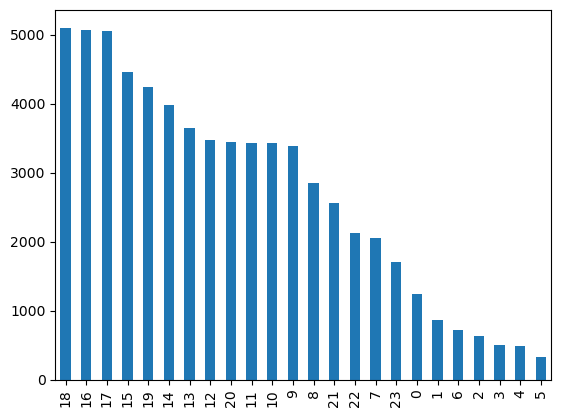

In [22]:
# EDA - Number of Rides per hour
newyork.hourofday.value_counts().plot(kind='bar')

In [23]:
# Average tip_amount hourwise
newyork.tip_amount.groupby(
    newyork.hourofday).mean().sort_values(ascending=False)

hourofday
18    2.337209
19    2.335306
20    2.299460
4     2.288150
17    2.288115
3     2.284553
21    2.274403
2     2.255683
22    2.200679
6     2.199820
1     2.185824
7     2.138447
9     2.125810
23    2.124479
16    2.122642
8     2.119490
10    2.069630
14    2.047275
5     2.038636
11    2.013868
15    2.008911
0     2.006965
12    2.006040
13    1.991064
Name: tip_amount, dtype: float64

In [24]:
# Average total_amount hourwise
newyork.total_amount.groupby(
    newyork.hourofday).mean().sort_values(ascending=False)

hourofday
5     29.790424
4     26.723130
3     25.431133
1     23.512169
2     22.873077
17    22.767988
19    22.524434
18    22.452836
0     22.359509
6     22.109723
23    21.963144
16    21.948968
11    21.782703
9     21.668357
20    21.655445
12    21.583762
21    21.512504
14    21.424771
10    21.403258
15    21.369393
22    21.225849
13    21.192671
8     21.124218
7     19.757717
Name: total_amount, dtype: float64

In [25]:
# Test Null Average total_amount of different trip_type equal
# Test Null Average tip_amount of different trip_type equal

# Test Null Average total_amount of different weekday equal
# Test Null Average tip_amount of different weekday equal

# Test Null No Association between trip_type and payment_type
# Test Null No Association between weekday and payment_type

In [26]:
# Test Null Average total_amount of different trip_type equal
newyork.total_amount.groupby(newyork.trip_type).mean()

trip_type
1.0    21.681149
2.0    29.377536
Name: total_amount, dtype: float64

In [27]:
newyork.total_amount.groupby(newyork.trip_type).var()

trip_type
1.0    194.936081
2.0    961.980543
Name: total_amount, dtype: float64

# Spliting Data

In [28]:
# split data 
triptype1=newyork[newyork.trip_type==1.0]
triptype2=newyork[newyork.trip_type==2.0]

# Hypothesis Testing

In [29]:
from scipy.stats import ttest_ind

In [30]:
ttest_ind(triptype1.total_amount,triptype2.total_amount,equal_var=False)

Ttest_indResult(statistic=-10.242149184539398, pvalue=6.091378571108912e-24)

In [31]:
newyork.total_amount.groupby(newyork.weekday).mean()

weekday
0    21.374454
1    22.016884
2    21.856680
3    22.322946
4    21.970345
5    21.681435
6    21.840600
Name: total_amount, dtype: float64

In [32]:
#split data
sun=newyork[newyork.weekday==0]
mon=newyork[newyork.weekday==1]
tue=newyork[newyork.weekday==2]
wed=newyork[newyork.weekday==3]
thu=newyork[newyork.weekday==4]
fri=newyork[newyork.weekday==5]
sat=newyork[newyork.weekday==6]


In [33]:
from scipy.stats import f_oneway

In [34]:
f_oneway(sun.total_amount,mon.total_amount,tue.total_amount,
         wed.total_amount,thu.total_amount,fri.total_amount,sat.total_amount)

#since pvalue=0.0010046928455678932 is less than 0/05, reject null.
# null no significant difference in average tip_amount of different weekday

F_onewayResult(statistic=3.741626502641873, pvalue=0.0010046928455678932)

In [35]:
newyork.tip_amount.groupby(newyork.weekday).mean()

weekday
0    2.059671
1    2.127444
2    2.177197
3    2.211572
4    2.133102
5    2.143962
6    2.222129
Name: tip_amount, dtype: float64

In [36]:
f_oneway(sun.tip_amount,mon.tip_amount,tue.tip_amount,
         wed.tip_amount,thu.tip_amount,fri.tip_amount,sat.tip_amount,)

#since pvalue=0.0027004822029087004 is less than 0/05, reject null.
# null no significant difference in average tip_amount of different weekday

F_onewayResult(statistic=3.343992139755747, pvalue=0.0027004822029087004)

In [37]:
from scipy.stats import chi2_contingency

In [38]:
chi2_contingency(pd.crosstab(newyork.trip_type,newyork.payment_type))

#since pvalue=2.3761129590419677e-07 is less than 0/05, reject null.
# null no association between both variable

Chi2ContingencyResult(statistic=33.6260027951775, pvalue=2.3761129590419677e-07, dof=3, expected_freq=array([[4.22236652e+04, 2.02930615e+04, 4.68286442e+02, 1.10986807e+02],
       [1.14633477e+03, 5.50938481e+02, 1.27135583e+01, 3.01319261e+00]]))

In [106]:
pd.crosstab(newyork.weekday,newyork.payment_type)

payment_type,1.0,2.0,3.0,4.0
weekday,,,,
0,5703,2925,62,10
1,6297,3099,60,12
2,6865,3203,86,18
3,7050,3221,80,19
4,7132,3452,80,27
5,5496,2706,48,19
6,4827,2238,65,9


In [39]:
chi2_contingency(pd.crosstab(newyork.weekday,
                            newyork.payment_type))
#since pvalue=0.003763076702047103 is less than 0/05, reject null.
# null no association between both variable

Chi2ContingencyResult(statistic=38.09473867395175, pvalue=0.003763076702047103, dof=18, expected_freq=array([[5822.01546082, 2798.11137342,   64.56973568,   15.30343008],
       [6335.9588946 , 3045.11706707,   70.26968477,   16.65435356],
       [6807.0737089 , 3271.53895292,   75.49463809,   17.89270009],
       [6939.57475042, 3335.22010832,   76.96415621,   18.24098505],
       [7154.38704501, 3438.46076934,   79.34655681,   18.80562885],
       [5533.59147649, 2659.49229274,   61.37093614,   14.54529464],
       [4777.39866377, 2296.05943619,   52.98429231,   12.55760774]]))

In [40]:
newyork['dayofmonth']=newyork.lpep_dropoff_datetime.dt.day

<Axes: xlabel='dayofmonth'>

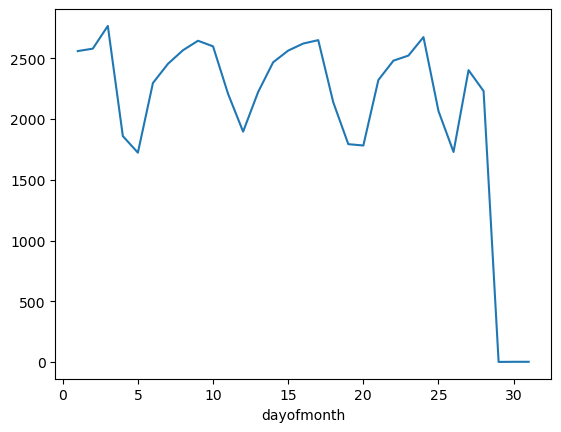

In [41]:
newyork.total_amount.groupby(
newyork.dayofmonth).count().plot(kind='line')

# Spliting Data into numcols and catcols

In [42]:
#Split Data into numcols and catcols
numcols=newyork[['passenger_count', 'trip_distance', 
                 'fare_amount', 'extra', 'mta_tax','tip_amount', 
                 'tolls_amount', 'improvement_surcharge', 
                 'total_amount','congestion_surcharge',
                 'trip_duration']]

In [43]:
catcols=newyork[['store_and_fwd_flag','RatecodeID',
                 'payment_type','trip_type','weekday',
                'hourofday']]

In [44]:
catcols_dummy=pd.get_dummies(catcols,columns=['store_and_fwd_flag','RatecodeID',
                 'payment_type','trip_type','weekday',
                'hourofday'])

In [45]:
print(catcols.shape)
print(catcols_dummy.shape)

(64809, 6)
(64809, 46)


In [46]:
import seaborn as sns

<Axes: >

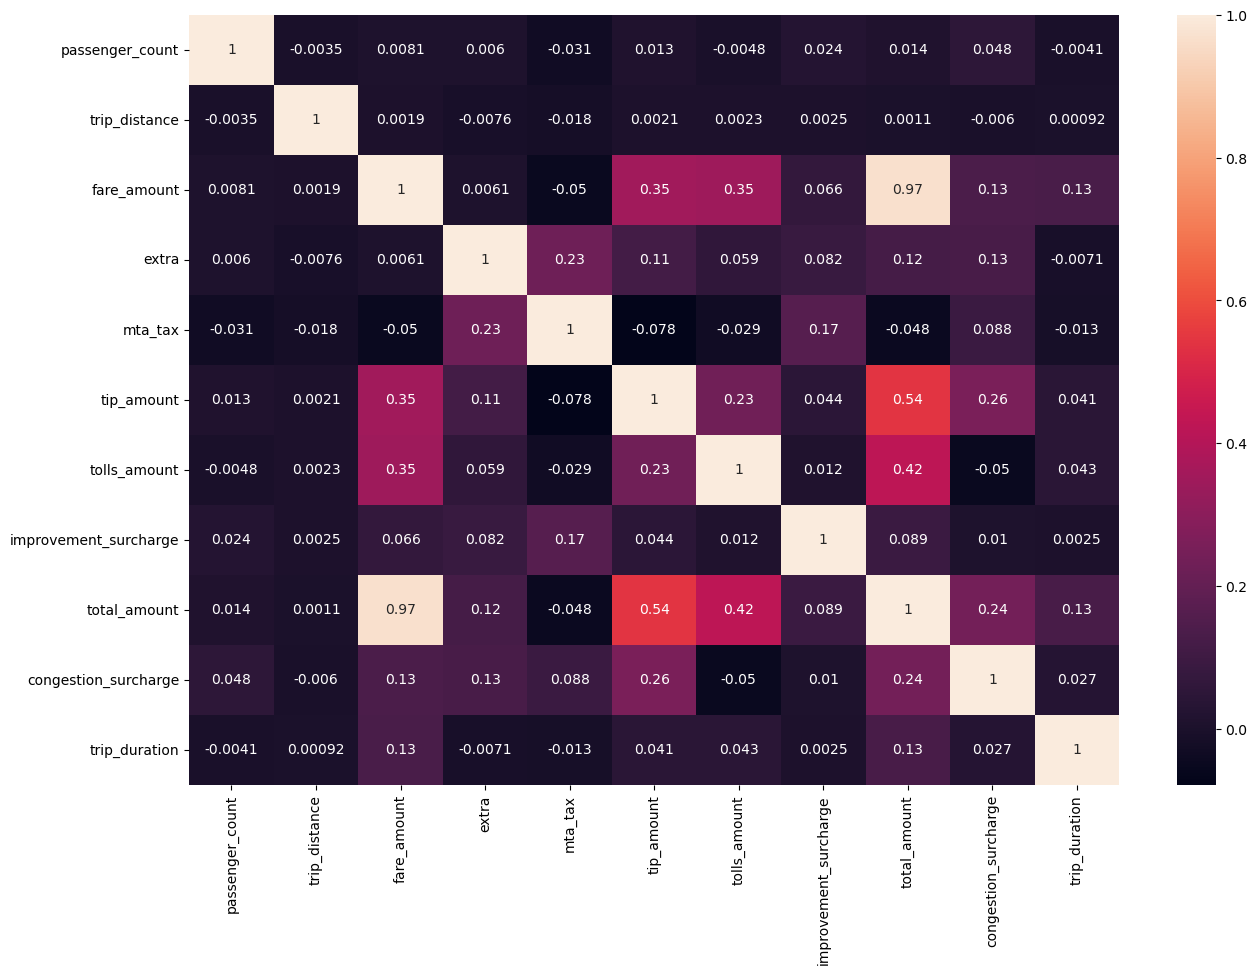

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(numcols.corr(),annot=True)

In [48]:
numcols=numcols.drop('fare_amount',axis=1)

<Axes: >

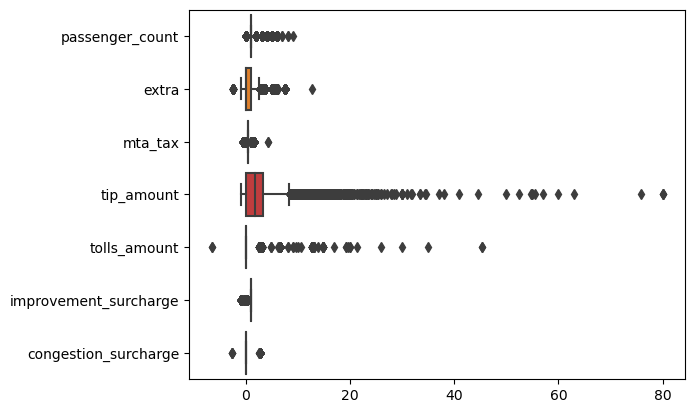

In [49]:
sns.boxplot(numcols.drop(['trip_distance',
                          'trip_duration',
                         'total_amount'],axis=1),orient='h')
# Outliers in most variables

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
robust=RobustScaler()

In [52]:
numcols=numcols.drop('total_amount',axis=1)

In [53]:
numcols_robust=robust.fit_transform(numcols)

In [54]:
numcols_robust=pd.DataFrame(numcols_robust,
                            columns=numcols.columns)

# Concating both dataframes

In [55]:
# Concat both dataframes
nyctaxi_df=pd.concat([numcols_robust,catcols_dummy],axis=1)

# Spliting Data into X And Y For Data Modules

In [56]:
y=newyork.total_amount
X=nyctaxi_df

C:\Users\ailla\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ailla\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

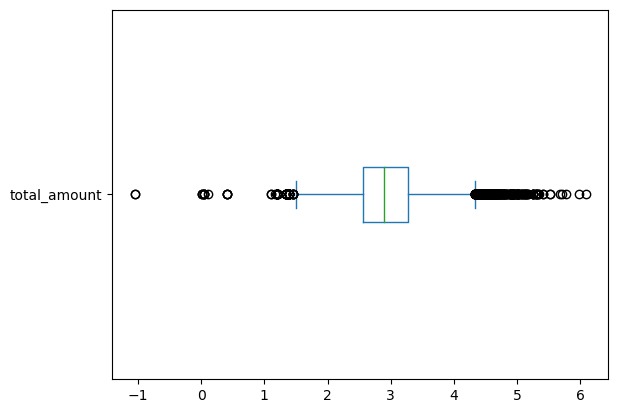

In [57]:
np.log(y).plot(kind='box',vert=False)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Split Data into Train(75%) & Test(25%)
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=42)

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
reg=LinearRegression()

In [62]:
regmodel=reg.fit(X_train,y_train)

In [63]:
regmodel.score(X_train,y_train)

0.48414927813761577

In [64]:
reg_train_pred=regmodel.predict(X_train)

In [65]:
reg_train_resid=y_train-reg_train_pred

In [66]:
np.sqrt(np.mean(reg_train_resid**2)) # RMSE

10.554617587762403

In [67]:
reg_test_pred=regmodel.predict(X_test)

In [68]:
reg_test_resid=y_test-reg_test_pred

In [69]:
np.sqrt(np.mean(reg_test_resid**2)) # RMSE

10.978791692838895

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree=DecisionTreeRegressor(max_depth=8)

In [72]:
treemodel=tree.fit(X_train,y_train)

In [73]:
treemodel.score(X_train,y_train)

0.8799775897338369

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(tree,X_train,y_train)

array([0.86734944, 0.83345602, 0.75852154, 0.84846357, 0.88285549])

In [76]:
np.mean([0.86674614, 0.83428582, 0.75785531, 0.84844425, 0.88246555])

0.837959414

In [77]:
tree_train_pred=treemodel.predict(X_train)

In [78]:
tree_train_resid=y_train-tree_train_pred

In [79]:
np.sqrt(np.mean(tree_train_resid**2))   # RMSE

5.091100301915005

In [80]:
tree_test_pred=treemodel.predict(X_test)

In [81]:
tree_test_resid=y_test-tree_test_pred

In [82]:
np.sqrt(np.mean(tree_test_resid**2))   # RMSE

6.752278860548865

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf=RandomForestRegressor(n_estimators=1000)

In [85]:
rfmodel=rf.fit(X_train,y_train)

In [86]:
rfmodel.score(X_train,y_train)

0.9836697366612958

In [88]:
cross_val_score(rf,X_train,y_train)

array([0.89437166, 0.85187797, 0.84514696, 0.88242439, 0.91812644])

In [89]:
np.mean([0.89437166, 0.85187797, 0.84514696, 0.88242439, 0.91812644])

0.878389484

In [90]:
RF_train_pred=rfmodel.predict(X_train)

In [91]:
RF_train_resid=y_train-RF_train_pred

In [92]:
np.sqrt(np.mean(RF_train_resid**2))   # RMSE

1.8779199490052243

In [93]:
RF_test_pred=rfmodel.predict(X_test)

In [94]:
RF_test_resid=y_test-RF_test_pred

In [95]:
np.sqrt(np.mean(RF_test_resid**2))    # RMSE

5.750202144233139

# Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
gbm=GradientBoostingRegressor(n_estimators=2000)

In [98]:
gbmmodel=gbm.fit(X_train,y_train)

In [99]:
gbmmodel.score(X_train,y_train)

0.9641167739639513

In [100]:
gbm_train_pred=gbmmodel.predict(X_train)

In [101]:
gbm_train_resid=y_train-gbm_train_pred

In [102]:
np.sqrt(np.mean(gbm_train_resid**2))     # RMSE

2.783724307910937

In [103]:
gbm_test_pred=gbmmodel.predict(X_test)

In [104]:
gbm_test_resid=y_test-gbm_test_pred

In [105]:
np.sqrt(np.mean(gbm_test_resid**2))      # RMSE

6.109480037760172

# Conclusion

Here is the Conlusion of the "NEWYORK CITY TRIP DURATION PREDICTION Project",
After creating the Linear Regression,Decision Tree,Random Forest,Gradient Boosting models
the best fit model is "RANDOM FOREST".